# Naive Bayes Code

In [109]:
# Step 1: Load libraries and data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, log_loss
import matplotlib.pyplot as plt

In [110]:
# Load the dataset
data = pd.read_csv('../ML Assignment 2/BreastCancerData.csv')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [112]:
data.shape

(569, 6)

In [113]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [114]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [115]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [116]:
X = data[['mean_radius', 'mean_perimeter', 'mean_texture', 'mean_area', 'mean_smoothness']]
y = data['diagnosis']

In [117]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
X.shape, y.shape

((569, 5), (569,))

In [119]:
# Initialize the Naive Bayes model
model = GaussianNB()

In [120]:
# Train the model on the training set
model.fit(X_train, y_train)

GaussianNB()

# Accuracy Values

In [121]:
print("The Accuracy of Naive Bayes Model is : ",model.score(X_train,y_train))

The Accuracy of Naive Bayes Model is :  0.8945054945054945


In [122]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [123]:
print("The Accuracy of Naive Bayes Model is : ",model.score(X_test,y_test))

The Accuracy of Naive Bayes Model is :  0.9385964912280702


# Confusion Matrix

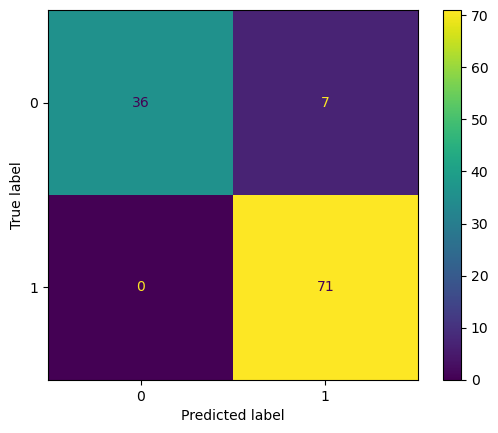

In [124]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
ConfusionMatrixDisplay(cm,display_labels=data['diagnosis'].unique()).plot()
plt.grid(False)

# Precision, Recall and F1-Score Values

In [125]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [126]:
print(precision)

0.9102564102564102


In [127]:
print(recall)

1.0


In [128]:
print(f1)

0.953020134228188


# ROC & AUC. Log Loss

In [129]:
# Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
    
# Calculate log loss
logloss = log_loss(y_test, y_prob)

In [130]:
print(roc_auc)

0.9823124795283327


In [131]:
print(logloss)

0.1911565459678712


# MeanSquaredError & r2_score

In [132]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [133]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.06140350877192982
R-squared: 0.7386177530298068


In [134]:
r2_score(y_test, y_pred)

0.7386177530298068

In [135]:
import seaborn as sns

In [136]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: diagnosis, Length: 114, dtype: int64

In [137]:
import numpy as np
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [138]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

# ROC Curve

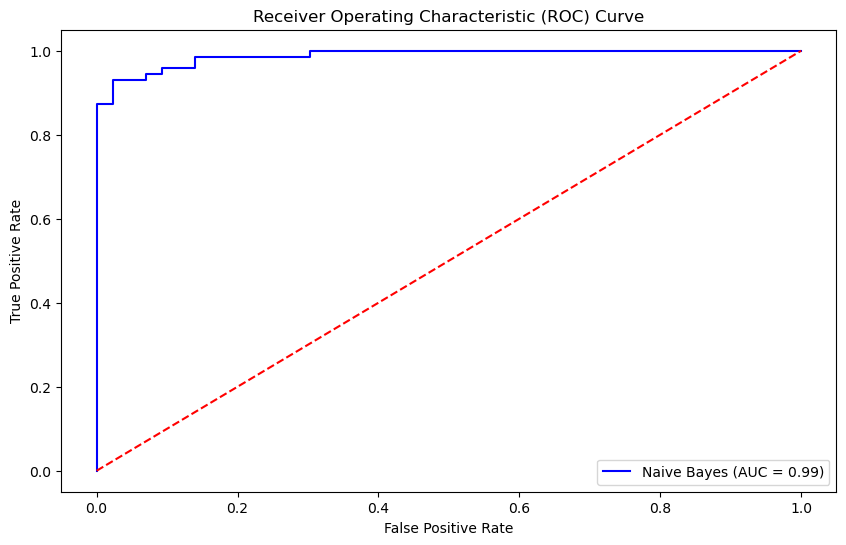

In [139]:
# Step 5: Visualize the results
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(model_fpr, model_tpr, color='blue', label=f'Naive Bayes (AUC = {model_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# How can I measure the performance of my model?


There are several ways to measure the performance of a machine learning model, depending on the type of problem you are trying to solve and the metrics that are most relevant for your specific use case. Here are some common approaches:

1. **Accuracy**: This is the most straightforward metric, representing the fraction of predictions that the model got correct. It works well for classification problems with balanced classes.

2. **Precision, Recall, and F1-Score**: These metrics are particularly useful for classification problems with imbalanced classes. Precision measures how many of the positive predictions were correct, recall measures how many of the actual positives were correctly identified, and F1-score combines precision and recall into a single metric.

3. **Confusion Matrix**: A confusion matrix displays the complete breakdown of correct and incorrect predictions for each class, providing deeper insight into the model's performance.

4. **Logarithmic Loss (Log Loss)**: This metric is often used for evaluating probabilistic classifiers, as it measures the uncertainty of the predictions.

5. **Area Under the ROC Curve (AUC-ROC)**: For binary classification problems, the ROC curve plots the true positive rate against the false positive rate at different classification thresholds. The AUC-ROC represents the model's ability to distinguish between classes.

6. **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**: These are common metrics for regression problems, measuring the average squared difference between the predicted and actual values.

7. **R-squared (R²)**: Also used for regression problems, R² measures how well the model's predictions approximate the real data points.

8. **Cross-Validation**: To get a more reliable estimate of a model's performance, it's common to use techniques like k-fold cross-validation, which trains and evaluates the model on different subsets of the data.

The choice of metric(s) depends on your specific problem and goals. It's also important to consider the trade-offs between different metrics and to evaluate your model using multiple relevant metrics to gain a comprehensive understanding of its performance.

# What are: Accuracy, Confusion Matrix, Precision, Recall & F1 Score, ROC & AUC. Log Loss?

**Accuracy:** The percentage of predictions that the model got correct out of the total predictions made. It works best when the classes are balanced.

**Confusion Matrix:** A table that shows the complete breakdown of correct and incorrect predictions across all classes. It gives a clear picture of which classes are being misclassified.

**Precision:** Out of all the positive predictions made by the model, precision measures the fraction that were actually correct positive predictions.

**Recall:** Out of all the actual positive instances in the data, recall measures the fraction that were correctly predicted as positive by the model.

**F1 Score:** The harmonic mean of precision and recall, providing a single balanced score that accounts for both metrics.

**ROC & AUC:** The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various thresholds. The Area Under the ROC Curve (AUC) summarizes the model's ability to distinguish between classes.

**Log Loss:** Used for probabilistic classification models that output prediction probabilities. Log loss penalizes confident incorrect predictions more than uncertain incorrect predictions.